In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c quora-question-pairs


quora-question-pairs.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile('quora-question-pairs.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/quora_question_pairs')


In [ ]:
import zipfile

# Unzip train.csv.zip
with zipfile.ZipFile('/content/quora_question_pairs/train.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/quora_question_pairs')


### Quora Question Pairs - Initial Exploratory Data Analysis (EDA)

In [ ]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load Data
# Reading the dataset into a pandas DataFrame
df = pd.read_csv("/content/quora_question_pairs/train.csv")
print("Dataset Shape:", df.shape)


Dataset Shape: (404290, 6)


In [ ]:
# Displaying Random Samples
# Displaying 10 random rows to understand the structure and content of the data
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
180350,180350,276536,276537,What is the structure of a microscope and its ...,What are the different parts of a compound lig...,0
306371,306371,429886,429887,How is structural engineering in UVCE?,How is mechanical engineering in UVCE? How are...,0
213386,213386,318693,318694,Did Mayank Parmar of SDMCET (Batch 2011) reall...,What is the role of SDMCET media in SDMCET?,0
226995,226995,335733,335734,Is the first week of January of this year a go...,Is the first week of July of this year a good ...,0
58013,58013,83186,1526,What can I do to stop thinking about anything?,How should I stop thinking about someone?,1
50317,50317,89407,89408,What's the best online resource to learn C?,What are the best online websites to study c p...,1
279189,279189,12645,99360,Can Darwin's theory of evolution ever be proven?,Why is Darwin's theory of evolution still cons...,1
358056,358056,421306,194113,What is the cause of conflict between Israel a...,Why is there conflict between the people of Is...,1
226923,226923,335642,242217,What are some ways to cope with anxiety?,How do you help someone cope with anxiety?,1
77364,77364,91701,87225,What is the weirdest thing that you have?,What is the weirdest thing you have seen some ...,0


In [ ]:
# Dataset Information
# Displaying data type and non-null count of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
# Checking for Missing Values
# Checking for missing values in each column
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64


In [ ]:
# Checking for Duplicate Rows
# Calculating the number of duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


In [ ]:
# Distribution of Duplicate and Non-Duplicate Questions
# Analyzing the distribution of duplicate (is_duplicate=1) and non-duplicate (is_duplicate=0) question pairs
print("Duplicate Question Counts:\n", df['is_duplicate'].value_counts())
print("Percentage Distribution of Duplicates:\n", (df['is_duplicate'].value_counts() / df['is_duplicate'].count()) * 100)


Duplicate Question Counts:
 is_duplicate
0    255027
1    149263
Name: count, dtype: int64
Percentage Distribution of Duplicates:
 is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


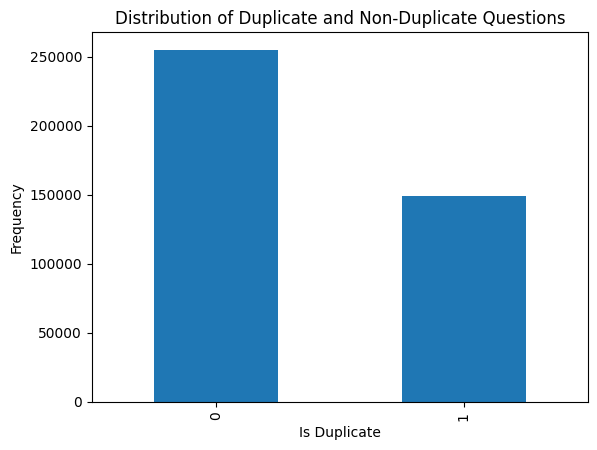

In [ ]:
# Visualizing the Distribution of Duplicate and Non-Duplicate Questions
# Bar plot to show the frequency of duplicate and non-duplicate pairs
df['is_duplicate'].value_counts().plot(kind='bar')
plt.title('Distribution of Duplicate and Non-Duplicate Questions')
plt.xlabel('Is Duplicate')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Analyzing Unique and Repeated Questions
# Concatenating qid1 and qid2 columns to calculate unique and repeated questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Total Unique Questions:', np.unique(qid).shape[0])

Total Unique Questions: 537933


In [ ]:
# Counting Repeated Questions
# Calculating the number of questions that appear more than once
x = qid.value_counts() > 1
print('Number of Repeated Questions:', x[x].shape[0])

Number of Repeated Questions: 111780


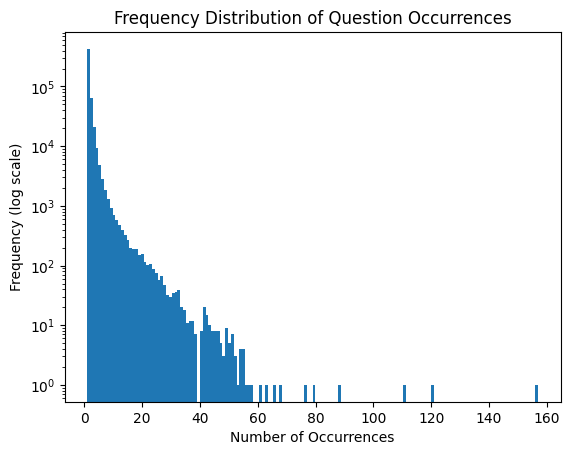

In [ ]:
# Visualizing the Frequency of Question Occurrences
# Histogram showing the frequency distribution of how often each question appears in the dataset
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')  # Log scale for better visibility
plt.title('Frequency Distribution of Question Occurrences')
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency (log scale)')
plt.show()